In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

<h4>Hands-on: Linear Regression with AWS ML - Normalization Demo</h4>
Model in this example is of the form:<br>
Target = x^2 + x + c<br>

However, what will happen if we have higher order polynomials or other complex features. How will this impact the model prediction? <br>

<b>Test 1</b><br>
Input Features: x, x^2, x^3, x^4 <br>
Output/Target: y_noisy<br>
Objective: How does model behave when there are several additional features are orders of magnitude different in scale

<b>Test 2</b><br>
Input Features: x, x^2, x^3, x^4 - features normalized using AWS ML Transformation<br>
Output/Target: y_noisy<br>
Objective: How does normalization improve prediction accuracy<br>

In [2]:
def quad_func (x):
    return 5 * x ** 2 -23 * x + 47

In [3]:
# Training Set: 140 samples
# Eval Set: 60 samples
# Test Set: 60 samples
# Total: 260 samples

In [4]:
np.random.seed(5)
samples = 260
x_vals = pd.Series(np.random.rand(samples) * 20)
x2_vals = x_vals ** 2
x3_vals = x_vals ** 3
x4_vals = x_vals ** 4

y_vals = x_vals.map(quad_func)
y_noisy_vals = y_vals + np.random.randn(samples) * 50

In [5]:
df = pd.DataFrame(
    {'x':x_vals, 
     'x2': x2_vals ,
     'x3': x3_vals ,
     'x4': x4_vals ,
     'y':y_vals,
     'y_noisy':y_noisy_vals})

In [6]:
df.head()

,x,x2,x3,x4,y,y_noisy
0,4.439863,19.712387,87.520307,388.578209,43.445077,88.950606
1,17.414646,303.269900,5281.337982,91972.632008,1162.812637,1193.704875
2,4.134383,17.093124,70.669522,292.174877,37.374807,62.355709
3,18.372218,337.538400,6201.329123,113932.171524,1312.130983,1254.553770
4,9.768224,95.418196,932.066288,9104.632078,299.421832,268.896012


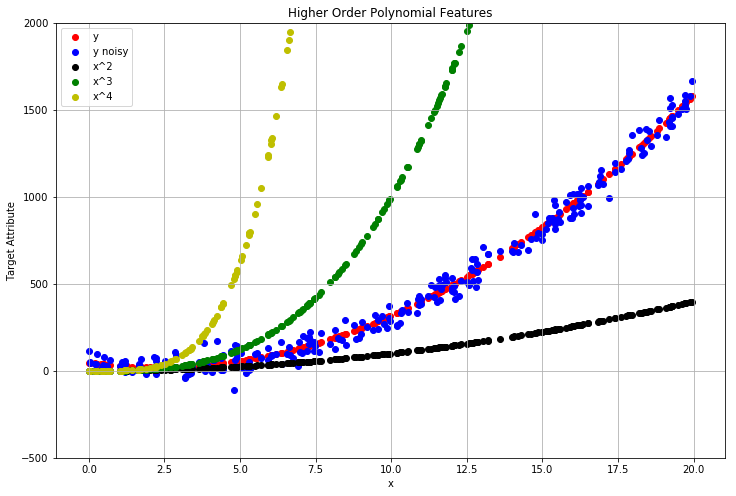

In [8]:
#df.plot(x='x',y='y', grid=True, kind='scatter')
fig = plt.figure(figsize = (12, 8))
plt.scatter(x = df['x'], y = df['y'], color = 'r',label = 'y',)
plt.scatter(x = df['x'], y = df['y_noisy'], color='b', label = 'y noisy')
plt.scatter(x = df['x'], y = df['x2'], color = 'k', label = 'x^2')
plt.scatter(x = df['x'], y = df['x3'], color = 'g', label = 'x^3')
plt.scatter(x = df['x'], y = df['x4'], color = 'y', label = 'x^4')
plt.ylim((-500, 2000))
plt.xlabel('x')
plt.ylabel('Target Attribute')
plt.title('Higher Order Polynomial Features')
plt.grid(True)
plt.legend()

In [9]:
df.corr()

,x,x2,x3,x4,y,y_noisy
x,1.000000,0.968304,0.916886,0.866451,0.948299,0.940940
x2,0.968304,1.000000,0.986075,0.958368,0.997515,0.991770
x3,0.916886,0.986075,1.000000,0.992140,0.994326,0.989924
x4,0.866451,0.958368,0.992140,1.000000,0.973345,0.970022
y,0.948299,0.997515,0.994326,0.973345,1.000000,0.994777
y_noisy,0.940940,0.991770,0.989924,0.970022,0.994777,1.000000


In [10]:
df.describe()

,x,x2,x3,x4,y,y_noisy
count,260.000000,260.000000,2.600000e+02,2.600000e+02,260.000000,260.000000
mean,10.060419,135.264356,2.044036e+03,3.291655e+04,491.932133,492.434283
std,5.846691,121.146840,2.313183e+03,4.371458e+04,476.707355,478.849813
min,0.007658,0.000059,4.490833e-07,3.439029e-09,20.571880,-112.575294
25%,4.905919,24.068179,1.180779e+02,5.792902e+02,54.504751,77.826912
50%,10.250928,105.083439,1.077242e+03,1.104334e+04,336.645858,327.241317
75%,15.400290,237.168945,3.652471e+03,5.624912e+04,878.638053,874.702202
max,19.944509,397.783452,7.933596e+03,1.582317e+05,1577.193548,1664.910364


In [11]:
data_path = '..\Data\RegressionExamples\quadratic_more_features'

In [13]:
df.to_csv(os.path.join(data_path, 'quadratic_more_features_example_all.csv'),
          index = True, 
          index_label = 'Row')

In [14]:
df[df.index < 200].to_csv(os.path.join(data_path, 'quadratic_more_features_example_train.csv'),
                          index = True,
                          index_label = 'Row',
                          columns = ['x','x2','x3','x4','y_noisy'])

In [17]:
df.to_csv(os.path.join(data_path, 'quadratic_more_features_example_test_all.csv'),
          index = True,
          index_label = 'Row', 
          columns = ['x','x2','x3','x4'])

In [21]:
# Pull Predictions
df = pd.read_csv(os.path.join(data_path,'quadratic_more_features_example_all.csv'), 
                 index_col = 'Row')
df_more_features_predicted = pd.read_csv(os.path.join(data_path,'output_more_features',
                                                      'bp-vYUTRecXupi-quadratic_more_features_example_test_all.csv.gz'))
df_more_features_predicted.columns = ["Row","y_predicted"]

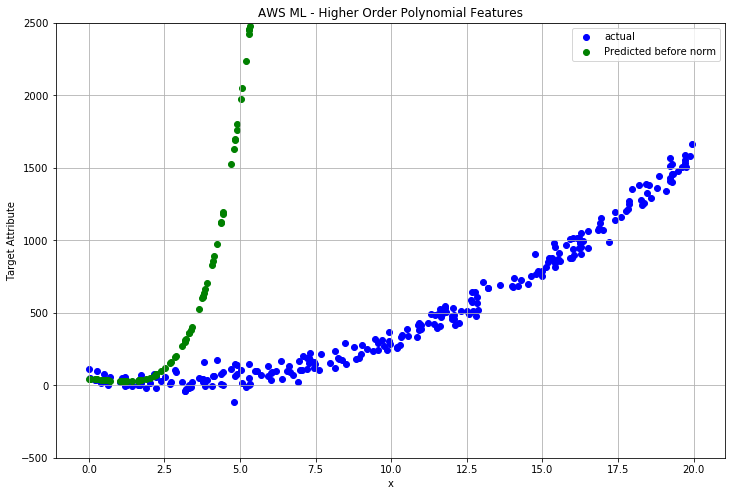

In [22]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(x = df['x'], y = df['y_noisy'], color = 'b', label = 'actual', )
plt.scatter(x = df['x'], y = df_more_features_predicted['y_predicted'],
            color = 'g', label = 'Predicted before norm')
plt.ylim((-500, 2500))
plt.title('AWS ML - Higher Order Polynomial Features')
plt.xlabel('x')
plt.ylabel('Target Attribute')
plt.grid(True)
plt.legend()

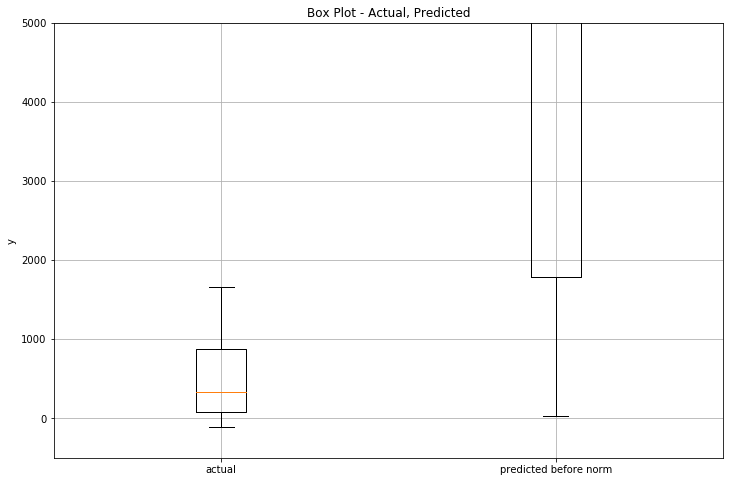

In [23]:
fig = plt.figure(figsize = (12, 8))
plt.boxplot([df.y_noisy,
             df_more_features_predicted.y_predicted], 
            labels = ['actual', 'predicted before norm'])
plt.title('Box Plot - Actual, Predicted')
plt.ylim((-500, 5000))
plt.ylabel('y')
plt.grid(True)

Training RMSE: 83973.66, Evaluation RMSE: 158260.62, Baseline RMSE: 437.31

x3, x4 are very large compared to rest of the features.  These terms totally dominates the outcome.

In [24]:
# Pull normalized predictions
df_more_normalize_features_predicted = pd.read_csv(
    os.path.join(data_path,'output_more_features_normalize',
                 'bp-zlJUq5GZtsS-quadratic_more_features_example_test_all.csv.gz'))
df_more_normalize_features_predicted.columns = ["Row","y_predicted"]

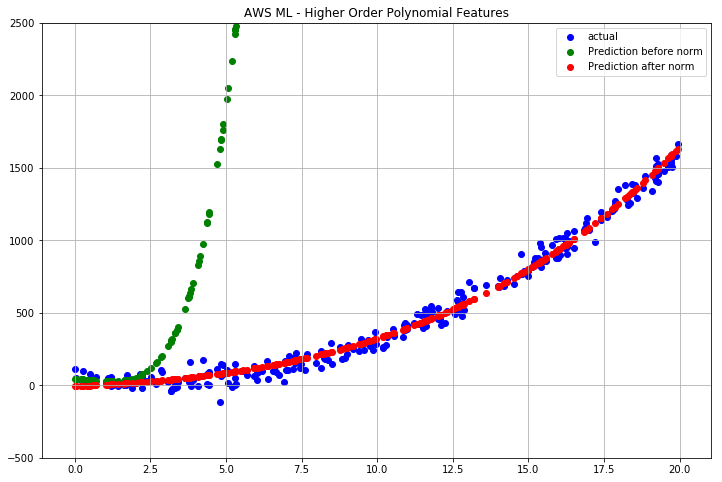

In [26]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(x = df['x'], y = df['y_noisy'], color = 'b', label = 'actual', )
plt.scatter(x = df['x'], y = df_more_features_predicted['y_predicted'],
            color = 'g', label = 'Prediction before norm')
plt.scatter(x = df['x'], y = df_more_normalize_features_predicted['y_predicted'],
           color = 'r', label = 'Prediction after norm')
plt.ylim((-500, 2500))
plt.title('AWS ML - Higher Order Polynomial Features')
plt.grid(True)
plt.legend()

 1. Before Normalization: x3, x4 are very large and dominates the outcome.<br>
 Training RMSE: 83973.66, Evaluation RMSE: 158260.62, Baseline RMSE: 437.31
 2. After normalization: all features have similar scale, range<br>
 Training RMSE: 72.35, Evaluation RMSE: 51.7387, Baseline RMSE: 437.31
 3. Normalized features were able to fit target attribute better

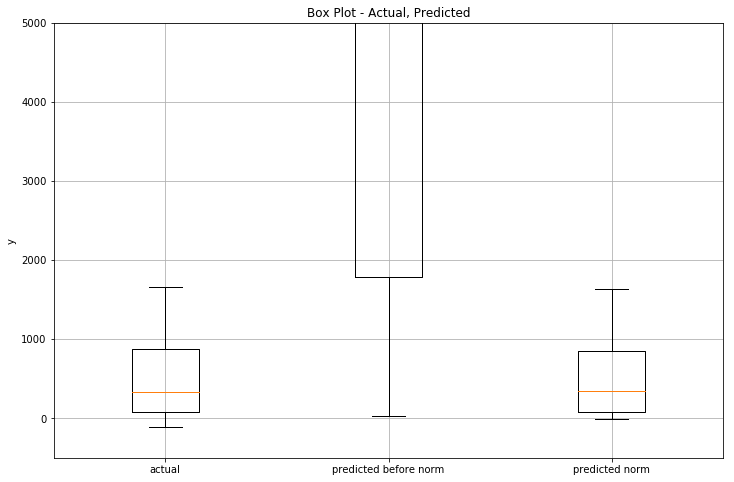

In [28]:
fig = plt.figure(figsize = (12, 8))
plt.boxplot([df.y_noisy,
             df_more_features_predicted.y_predicted,
             df_more_normalize_features_predicted.y_predicted], 
            labels=['actual','predicted before norm','predicted norm'])
plt.title('Box Plot - Actual, Predicted')
plt.ylim((-500,5000))
plt.ylabel('y')
plt.grid(True)

<h4>Summary</h4>
1. Having lot of features and complex features can help improve prediction accuracy
2. When feature ranges are orders of magnitude different, it can dominate the outcome. Normalization is a process of transforming features to have a mean of 0 and variance of 1. This will ensure all feature have similar scale.
3. Without Normalization:<br>
Training RMSE: 83973.66, Evaluation RMSE: 158260.62, Baseline RMSE: 437.31
4. With Normalization:<br>
Training RMSE: 72.35, Evaluation RMSE: 51.7387, Baseline RMSE: 437.31
5. Normalization can be easily enabled using AWS ML Transformation recipes